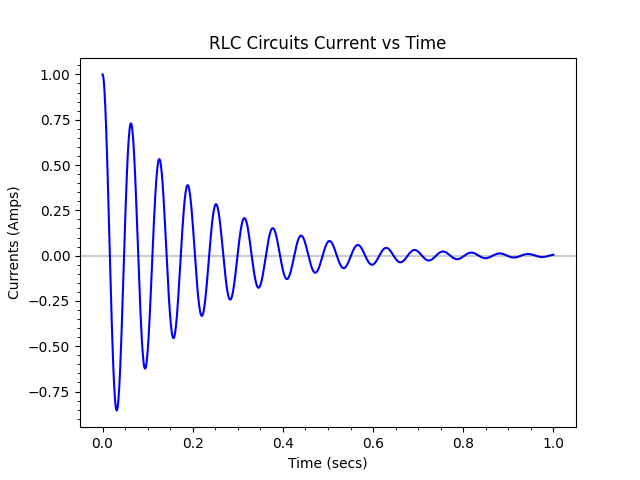

In [31]:
# Cell 1
"""rlc_circuit.ipynb"""

from __future__ import annotations

import typing

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator
from scipy.integrate import solve_ivp  # type: ignore

if typing.TYPE_CHECKING:
    from typing import Any

    from matplotlib.axes import Axes
    from numpy.typing import NDArray

%matplotlib widget

def model(
    time, state_vector: tuple[float, float], resistance: float, inductance: float, capacitance: float
) -> tuple[float, float]:
    """Calculates the differentials for Scipy to use"""
    current_d: float
    current: float
    current_d, current = state_vector  # unpack dependent variables
    #Calculates the differential equations
    d_speed: float = (-resistance / inductance) * current_d - (current / (inductance * capacitance))
    d_current: float = current_d
    current = current_d
    return d_speed, d_current


def plot(ax: Axes) -> None:
    """Plot the differential equation for an RLC circuit"""
    # Initialize constants
    resistance: float = .1
    inductance: float = .01
    capacitance: float = .01
    current_d = 0
    current_init = 1

    # Set model duration (seconds)
    time_initial = 0
    time_final = 1

    # Invoke Scipy Initial Value Problem (ivp) Solver
    sol: Any = solve_ivp(
        model,
        (time_initial, time_final),
        [current_d, current_init],
        max_step=0.001,
        args=[resistance, inductance, capacitance],
    )
    
    time_steps: NDArray[np.float_] = np.array(sol.t, dtype=np.float_)
    currents: NDArray[np.float_] = np.array(sol.y[1], dtype=np.float_)

    ax.plot(time_steps, currents, color="blue", linestyle="solid")

    ax.set_title("RLC Circuits Current vs Time")
    ax.set_ylabel("Currents (Amps)")
    ax.set_xlabel("Time (secs)")

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.axhline(0, color='black', alpha=.2)


def plot_rlc() -> None:
    plt.close("all")
    plt.figure(" ")
    plot(plt.axes())
    plt.show()


plot_rlc()
